In [21]:
import cv2 as cv
import numpy as np
import imutils
import matplotlib.pyplot as plt
import easyocr

### 1. Read in Image, Grayscale and Blur

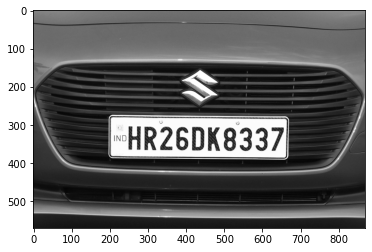

In [101]:
img = cv.imread('car_1.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))

### 2. Apply filter and find edges for localization

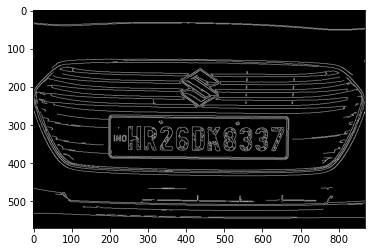

In [102]:
bfilter = cv.bilateralFilter(gray, 11, 17, 17)
edged = cv.Canny(bfilter, 30, 200)
plt.imshow(cv.cvtColor(edged, cv.COLOR_BGR2RGB))

### 3. Find Contours and Apply Mask

In [103]:
keypoints = cv.findContours(edged.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv.contourArea, reverse = True)[:10]

In [104]:
location = None

for contour in contours:
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [105]:
location

array([[[198, 282]],

       [[663, 278]],

       [[669, 381]],

       [[206, 387]]], dtype=int32)

In [106]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv.drawContours(mask, [location], 0, 255, -1)
new_image = cv.bitwise_and(img, img, mask=mask)

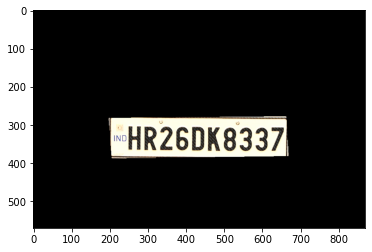

In [107]:
plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))

In [108]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

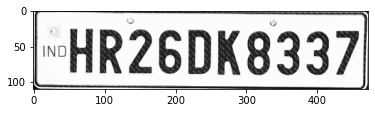

In [109]:
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))

### 4. Use Easy OCR To Read Text

In [110]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [124]:
coordinates, text, acuracy = result[1]

In [125]:
text

'HRZGDK8337|'

In [201]:
def number_plate_cars_to_text(img_path):
    img = cv.imread(img_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    bfilter = cv.bilateralFilter(gray, 11, 17, 17)
    edged = cv.Canny(bfilter, 30, 200)
    keypoints = cv.findContours(edged.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key = cv.contourArea, reverse = True)[:10]
    location = None
    for contour in contours:
        approx = cv.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv.drawContours(mask, [location], 0, 255, -1)
    new_image = cv.bitwise_and(img, img, mask=mask)
    (x,y) = np.where(mask==255)
    (x1,y1) = (np.min(x), np.min(y))
    (x2,y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
#     plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))
    
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    f.add_subplot(1,2, 2)
    plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))
    plt.show(block=True)
    
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    texts = []
    for i in range(len(result)):
        coordinates, text, acuracy = result[i]
        texts.append(text)
    return texts


# examples

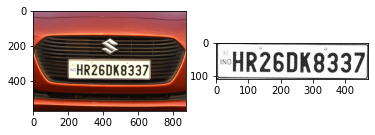

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['INDI', 'HRZGDK8337|']

In [203]:
number_plate_cars_to_text('car_1.jpg')


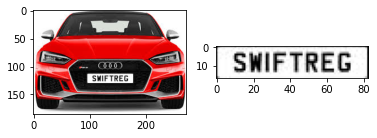

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['SWIFTREG']

In [204]:
number_plate_cars_to_text('car_2.jpg')

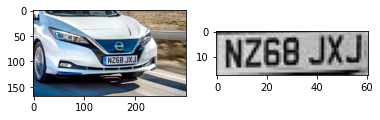

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['NZGB JXJ']

In [205]:
number_plate_cars_to_text('car_3.jpg')

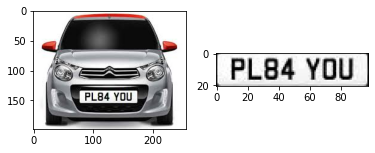

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['PL84 YOU']

In [206]:
number_plate_cars_to_text('car_4.jpg')

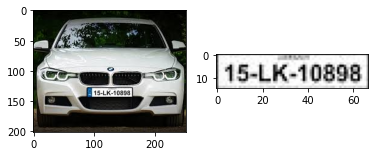

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['15-LK-10898']

In [213]:
number_plate_cars_to_text('car_5.jpg')

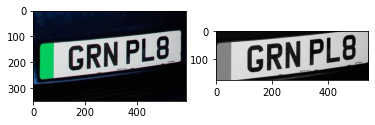

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['GRN', 'PL8']

In [208]:
number_plate_cars_to_text('car_6.jpg')

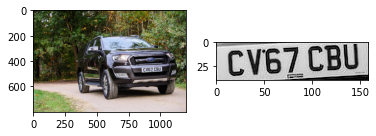

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['CV6Z CBU']

In [209]:
number_plate_cars_to_text('car_7.jpg')

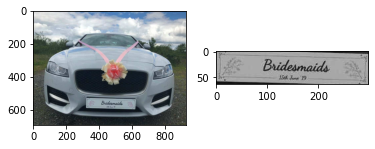

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Bridesmaida', 'K ?']

In [210]:
number_plate_cars_to_text('car_8.jpg')

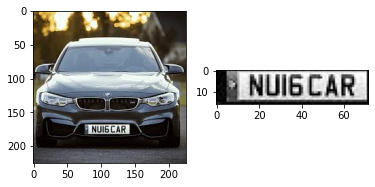

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['NUI6CAR']

In [211]:
number_plate_cars_to_text('car_9.jpg')